#  David Vaughan  R1166390
# (MATH-4000-004)
# Homework 4 01/25/2023
#  Spring 2023 TTU Selected Topics: Machine learning model order reduction for differential equations (MATH-4000-004) Full Term: Homework for week 1 (due 01/25)

### Install Pytorch before working on the homework.

### Problem 1

Run the code for feedforward neural network with 2 hidden layers and make the following change.

1. Change the learning rate to 1, 0.1, 0.01, 0.001, 0.0001 and compare which one results in the smaller MSE.

2. Change the mean squared loss to L1Loss function in https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html and compare with the MSE loss.

3. Change the total number of iterations in optimization algorithm to 1e5, 1e6, 1e7 and see if the MSE will decrease further.

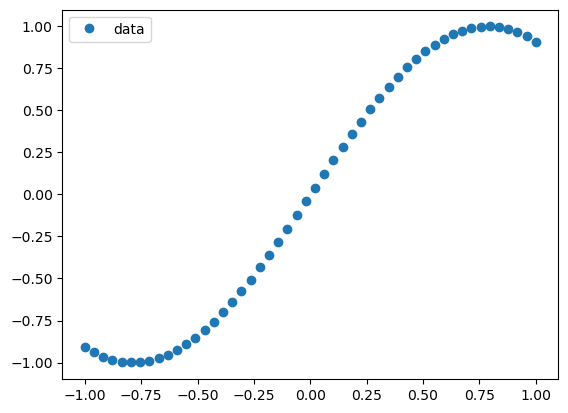

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
N = 50
x_data = torch.linspace(-1, 1, N)
x_data = torch.reshape(x_data, (N, 1))
y_data = torch.sin(2*x_data)

plt.figure()
plt.plot(x_data, y_data, 'o', label='data')
plt.legend()
plt.show()

In [2]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

In [3]:

# feedforward neural network with 2 hidden layers
class FNNTwoHiddenLayer(torch.nn.Module):
    
    def __init__(self):
        super(FNNTwoHiddenLayer, self).__init__()    
        
        self.hidden_layer1 = torch.nn.Linear(1, 10)
        self.hidden_layer2 = torch.nn.Linear(10, 10)
        self.output_layer  = torch.nn.Linear(10, 1)
                    
    def forward(self, x):
        
        # input layer
        z = x
        
        # hidden layer 1
        # z = W_1 * z + b_1
        # W_1: 10 * 1
        # b_1: 10 * 1
        z = self.hidden_layer1(z)
        # z = ReLU(z)
        z = torch.nn.functional.relu(z)

        # hidden layer 2
        # z = W_2 * z + b_2
        # W_2: 10 * 10
        # b_2: 10 * 1        
        z = self.hidden_layer2(z)
        # z = ReLU(z)
        z = torch.nn.functional.relu(z)
        
        # output layer
        # z = W_3 * z + b_3
        # W_3: 1 * 10
        # b_3: 1
        z = self.output_layer(z)
        
        # z: 1
        return z


In [4]:
###
# Running the function twice gets 2 different result for some reason?
def prob1(learning_rate,iteration):
    print("Learning rate is",learning_rate)
    
    # initialize an object
    fnn2 = FNNTwoHiddenLayer()

    # MSELoss: mean squared loss
    criterion = torch.nn.MSELoss()

    # optimization algorithm
    # SGD: gradient desent
    # lr: learning rate
    # optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.001)

    # Parameter, in its raw form, is a tensor i.e. a multi dimensional matrix. It sub-classes the Variable class. 
    lr = learning_rate
    optimizer = torch.optim.Adam(fnn2.parameters(), lr)

    # epoch: number of iterations in optimization algorithm
    total_epoch = iteration

    # record time
    time_start = time.time()
    
    for epoch in range(total_epoch):

        # initialize gradient to be zero in the optimization algorithm
        optimizer.zero_grad()

        # compute the loss function
        loss = criterion(fnn2(x_data), y_data)

        # compute the gradient of the loss function: \nabla loss(w,b)
        loss.backward()

        # w_(n+1) = w_n - eta * \nabla loss(w_n)
        optimizer.step()

        if epoch%1000 == 0:
            time_end = time.time()
            print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))
    
    
    print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))
    # plot
    plt.figure()
    plt.plot(x_data, y_data, 'o', label='data')
    plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
    plt.legend()
    plt.show()
    return loss.item()

In [5]:
y = 1.0
for i in range (5):
    print (y)
    y = y/10

1.0
0.1
0.01
0.001
0.0001


arr1 [ 1.   2.   2.5  5.  10. ]
Learning rate is 1.0
epoch: 0; MSE: 6.42e-01; elapsed time: 0.02 sec
epoch: 1000; MSE: 5.99e-01; elapsed time: 0.65 sec
epoch: 2000; MSE: 5.99e-01; elapsed time: 1.31 sec
epoch: 3000; MSE: 5.99e-01; elapsed time: 1.96 sec
epoch: 4000; MSE: 5.99e-01; elapsed time: 2.61 sec
epoch: 5000; MSE: 5.99e-01; elapsed time: 3.24 sec
epoch: 6000; MSE: 5.99e-01; elapsed time: 3.88 sec
epoch: 7000; MSE: 5.99e-01; elapsed time: 4.51 sec
epoch: 8000; MSE: 5.99e-01; elapsed time: 5.18 sec
epoch: 9000; MSE: 5.99e-01; elapsed time: 5.83 sec
epoch: 9999; MSE: 5.99e-01; elapsed time: 5.83 sec


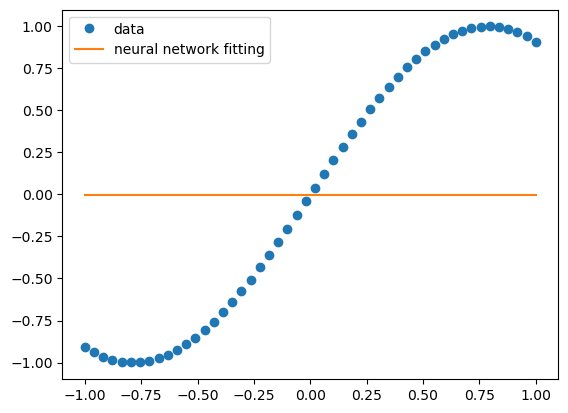

loss x is 0.59903883934021
Learning rate is 0.1
epoch: 0; MSE: 7.12e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 7.50e-04; elapsed time: 0.66 sec
epoch: 2000; MSE: 1.32e-03; elapsed time: 1.36 sec
epoch: 3000; MSE: 7.62e-04; elapsed time: 2.04 sec
epoch: 4000; MSE: 7.90e-04; elapsed time: 2.72 sec
epoch: 5000; MSE: 7.53e-04; elapsed time: 3.38 sec
epoch: 6000; MSE: 7.47e-04; elapsed time: 4.04 sec
epoch: 7000; MSE: 7.68e-04; elapsed time: 4.72 sec
epoch: 8000; MSE: 7.47e-04; elapsed time: 5.38 sec
epoch: 9000; MSE: 7.47e-04; elapsed time: 6.01 sec
epoch: 9999; MSE: 8.16e-04; elapsed time: 6.01 sec


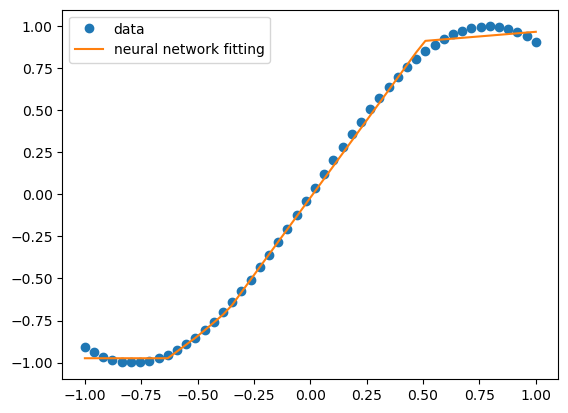

loss x is 0.000816419196780771
Learning rate is 0.01
epoch: 0; MSE: 6.17e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 2.61e-04; elapsed time: 0.65 sec
epoch: 2000; MSE: 6.19e-05; elapsed time: 1.29 sec
epoch: 3000; MSE: 3.29e-05; elapsed time: 1.94 sec
epoch: 4000; MSE: 3.04e-05; elapsed time: 2.59 sec
epoch: 5000; MSE: 3.01e-05; elapsed time: 3.26 sec
epoch: 6000; MSE: 4.01e-05; elapsed time: 3.88 sec
epoch: 7000; MSE: 3.04e-05; elapsed time: 4.54 sec
epoch: 8000; MSE: 3.01e-05; elapsed time: 5.20 sec
epoch: 9000; MSE: 2.99e-05; elapsed time: 5.85 sec
epoch: 9999; MSE: 2.98e-05; elapsed time: 5.85 sec


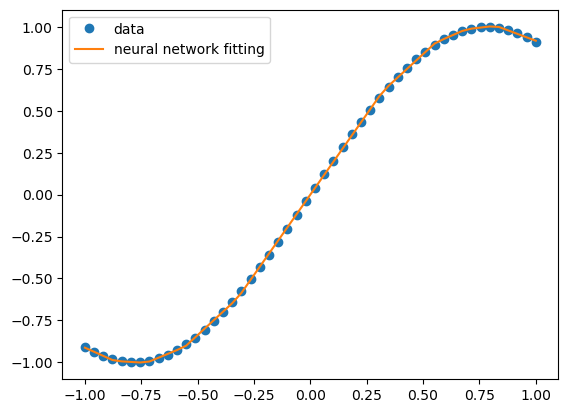

loss x is 2.9806837119394913e-05
Learning rate is 0.001
epoch: 0; MSE: 6.23e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 2.75e-03; elapsed time: 0.64 sec
epoch: 2000; MSE: 1.29e-03; elapsed time: 1.30 sec
epoch: 3000; MSE: 7.87e-04; elapsed time: 1.97 sec
epoch: 4000; MSE: 5.09e-04; elapsed time: 2.59 sec
epoch: 5000; MSE: 2.72e-04; elapsed time: 3.25 sec
epoch: 6000; MSE: 1.11e-04; elapsed time: 3.90 sec
epoch: 7000; MSE: 4.95e-05; elapsed time: 4.58 sec
epoch: 8000; MSE: 3.44e-05; elapsed time: 5.25 sec
epoch: 9000; MSE: 2.85e-05; elapsed time: 5.92 sec
epoch: 9999; MSE: 2.46e-05; elapsed time: 5.92 sec


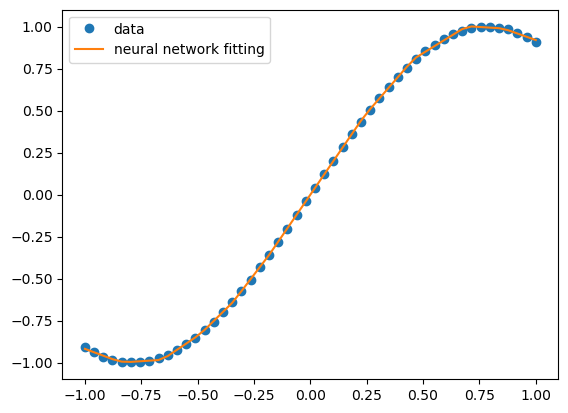

loss x is 2.4597869924036786e-05
Learning rate is 0.0001
epoch: 0; MSE: 6.24e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 2.10e-01; elapsed time: 0.67 sec
epoch: 2000; MSE: 1.46e-02; elapsed time: 1.34 sec
epoch: 3000; MSE: 5.08e-03; elapsed time: 2.01 sec
epoch: 4000; MSE: 2.79e-03; elapsed time: 2.62 sec
epoch: 5000; MSE: 1.94e-03; elapsed time: 3.24 sec
epoch: 6000; MSE: 1.35e-03; elapsed time: 3.87 sec
epoch: 7000; MSE: 9.64e-04; elapsed time: 4.49 sec
epoch: 8000; MSE: 6.70e-04; elapsed time: 5.14 sec
epoch: 9000; MSE: 4.48e-04; elapsed time: 5.79 sec
epoch: 9999; MSE: 2.83e-04; elapsed time: 5.79 sec


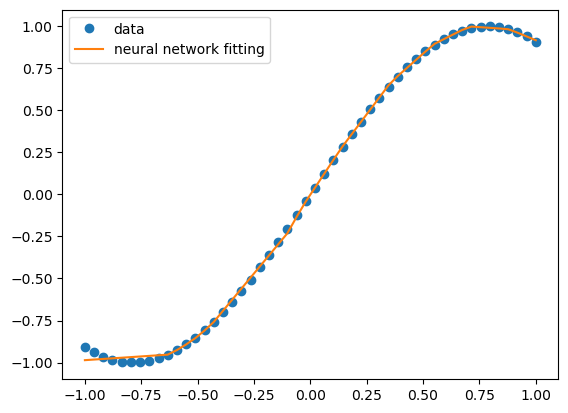

loss x is 0.0002832636528182775


In [6]:
# Change the learning rate to 1, 0.1, 0.01, 0.001, 0.0001
x = 1.0
arr1 = np.empty(5)
print("arr1",arr1)
for i in range (5):
    loss = prob1(x,10000)
    print("loss x is",loss)
    arr1.put(i,loss)
    x = x/10

In [13]:
print("arr1 of MSE(loss)",arr1)

arr1 of MSE(loss) [5.99038839e-01 8.16419197e-04 2.98068371e-05 2.45978699e-05
 2.83263653e-04]


In [14]:
#loss1 = prob1(1.0,10000)
#print("Mse of 1 is",loss1)

In [15]:
#loss2 = prob1(0.1,10000)
#print("Mse of .1 is",loss2)

In [16]:
#loss2 = prob1(0.1,10000)
# print("Mse of .1 is",loss2)

In [17]:
#loss3 = prob1(.01,10000)
#print("Mse of .01 is",loss3)

In [18]:
#loss4 = prob1(.001,10000)
#print("Mse of .001 is",loss4)

In [19]:
#loss5 = prob1(.0001,10000)
#print("Mse of .0001 is",loss5)

In [20]:
# Running the function twice gets 2 different result for some reason?
#print("Loss1 is",format(loss1, 'e'),"Loss2 is",format(loss2, 'e'),"Loss3 is",format(loss3, 'e'),
 #     "Loss4 is",format(loss4, 'e'),"Loss5 is",format(loss5, 'e'))
print()
print("arr1 MSELoss: mean squared loss  function  MSE is",arr1)
print()
print()
print()


arr1 MSELoss: mean squared loss  function  MSE is [5.99038839e-01 8.16419197e-04 2.98068371e-05 2.45978699e-05
 2.83263653e-04]





### .001 Produces smallest loss

In [21]:
######### Change the mean squared loss to L1Loss function 
# in https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html and compare with the MSE loss.
def prob1b(learning_rate,iteration):
    print("Learning rate is",learning_rate)
    
    # initialize an object
    fnn2 = FNNTwoHiddenLayer()
    '''
    
    Creates a criterion that measures the mean absolute error (MAE) between each element in the input xx and target yy.

    The unreduced (i.e. with reduction set to 'none') loss can be described as:
    ℓ(x,y)=L={l1,…,lN}⊤,ln=∣xn−yn∣,
    ℓ(x,y)=L={l1​,…,lN​}⊤,ln​=∣xn​−yn​∣,

    where NN is the batch size. If reduction is not 'none' (default 'mean'), then:
    ℓ(x,y)={mean⁡(L),if reduction=‘mean’;sum⁡(L),if reduction=‘sum’.
    ℓ(x,y)={mean(L),sum(L),​if reduction=‘mean’;if reduction=‘sum’.​

    xx and yy are tensors of arbitrary shapes with a total of nn elements each.

    The sum operation still operates over all the elements, and divides by nn.

    The division by nn can be avoided if one sets reduction = 'sum'.

    Supports real-valued and complex-valued inputs.
    '''
    # L1 loss
    criterion = torch.nn.L1Loss()

    # optimization algorithm
    # SGD: gradient desent
    # lr: learning rate
    # optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.001)

    # Parameter, in its raw form, is a tensor i.e. a multi dimensional matrix. It sub-classes the Variable class. 
    lr = learning_rate
    optimizer = torch.optim.Adam(fnn2.parameters(), lr)

    # epoch: number of iterations in optimization algorithm
    total_epoch = iteration

    # record time
    time_start = time.time()
    for epoch in range(total_epoch):

        # initialize gradient to be zero in the optimization algorithm
        optimizer.zero_grad()

        # compute the loss function
        loss = criterion(fnn2(x_data), y_data)

        # compute the gradient of the loss function: \nabla loss(w,b)
        loss.backward()

        # w_(n+1) = w_n - eta * \nabla loss(w_n)
        optimizer.step()

        if epoch%1000 == 0:
            time_end = time.time()
            print("epoch: %d; L1Loss: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))

    # plot
    plt.figure()
    plt.plot(x_data, y_data, 'o', label='data')
    plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
    plt.legend()
    plt.show()
    return loss.item()

arr2 []
Learning rate is 1.0
epoch: 0; L1Loss: 7.48e-01; elapsed time: 0.01 sec
epoch: 1000; L1Loss: 7.12e-01; elapsed time: 0.70 sec
epoch: 2000; L1Loss: 7.12e-01; elapsed time: 1.36 sec
epoch: 3000; L1Loss: 7.12e-01; elapsed time: 2.03 sec
epoch: 4000; L1Loss: 7.12e-01; elapsed time: 2.69 sec
epoch: 5000; L1Loss: 7.12e-01; elapsed time: 3.36 sec
epoch: 6000; L1Loss: 7.12e-01; elapsed time: 4.03 sec
epoch: 7000; L1Loss: 7.12e-01; elapsed time: 4.70 sec
epoch: 8000; L1Loss: 7.12e-01; elapsed time: 5.36 sec
epoch: 9000; L1Loss: 7.12e-01; elapsed time: 6.04 sec


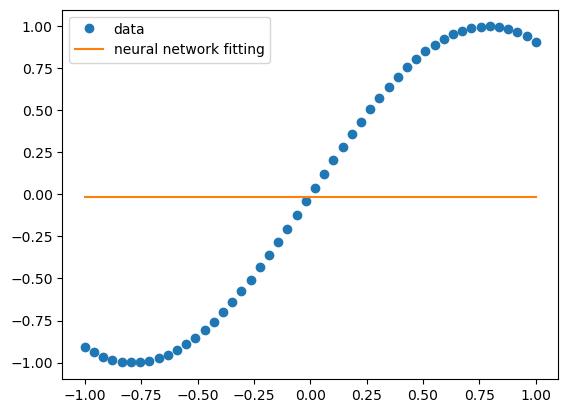

loss x is 7.121208e-01
Learning rate is 0.1
epoch: 0; L1Loss: 7.43e-01; elapsed time: 0.00 sec
epoch: 1000; L1Loss: 4.49e-02; elapsed time: 0.64 sec
epoch: 2000; L1Loss: 4.24e-02; elapsed time: 1.29 sec
epoch: 3000; L1Loss: 1.95e-02; elapsed time: 1.97 sec
epoch: 4000; L1Loss: 1.56e-02; elapsed time: 2.64 sec
epoch: 5000; L1Loss: 1.83e-02; elapsed time: 3.30 sec
epoch: 6000; L1Loss: 4.31e-02; elapsed time: 3.99 sec
epoch: 7000; L1Loss: 4.03e-02; elapsed time: 4.65 sec
epoch: 8000; L1Loss: 1.58e-02; elapsed time: 5.30 sec
epoch: 9000; L1Loss: 1.33e-02; elapsed time: 5.96 sec


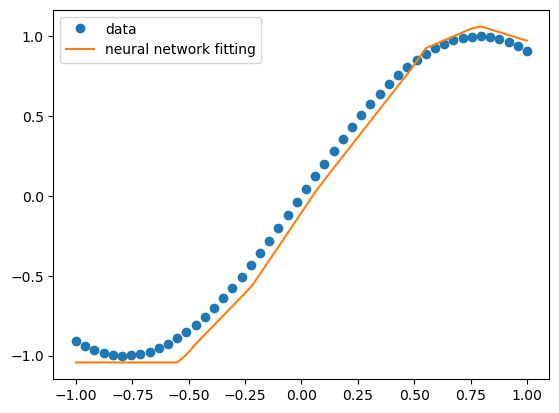

loss x is 6.167202e-02
Learning rate is 0.01
epoch: 0; L1Loss: 7.19e-01; elapsed time: 0.00 sec
epoch: 1000; L1Loss: 1.24e-02; elapsed time: 0.64 sec
epoch: 2000; L1Loss: 1.40e-02; elapsed time: 1.34 sec
epoch: 3000; L1Loss: 7.98e-03; elapsed time: 2.01 sec
epoch: 4000; L1Loss: 6.71e-03; elapsed time: 2.67 sec
epoch: 5000; L1Loss: 4.20e-03; elapsed time: 3.34 sec
epoch: 6000; L1Loss: 8.43e-03; elapsed time: 4.02 sec
epoch: 7000; L1Loss: 6.57e-03; elapsed time: 4.66 sec
epoch: 8000; L1Loss: 8.38e-03; elapsed time: 5.31 sec
epoch: 9000; L1Loss: 1.28e-02; elapsed time: 5.97 sec


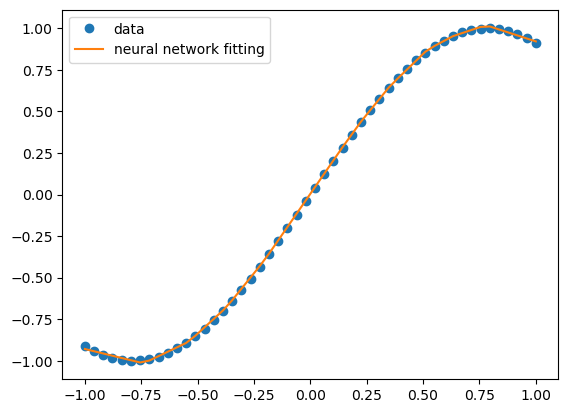

loss x is 5.387740e-03
Learning rate is 0.001
epoch: 0; L1Loss: 7.52e-01; elapsed time: 0.00 sec
epoch: 1000; L1Loss: 9.24e-03; elapsed time: 0.69 sec
epoch: 2000; L1Loss: 7.02e-03; elapsed time: 1.37 sec
epoch: 3000; L1Loss: 5.74e-03; elapsed time: 2.05 sec
epoch: 4000; L1Loss: 4.61e-03; elapsed time: 2.73 sec
epoch: 5000; L1Loss: 4.11e-03; elapsed time: 3.40 sec
epoch: 6000; L1Loss: 3.97e-03; elapsed time: 4.11 sec
epoch: 7000; L1Loss: 3.88e-03; elapsed time: 4.78 sec
epoch: 8000; L1Loss: 4.12e-03; elapsed time: 5.47 sec
epoch: 9000; L1Loss: 4.05e-03; elapsed time: 6.15 sec


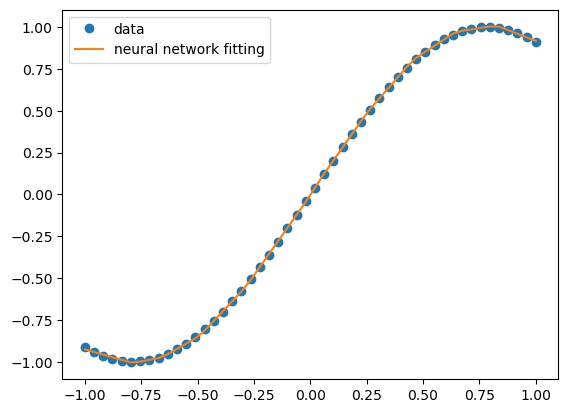

loss x is 3.679330e-03
Learning rate is 0.0001
epoch: 0; L1Loss: 7.17e-01; elapsed time: 0.00 sec
epoch: 1000; L1Loss: 4.27e-01; elapsed time: 0.68 sec
epoch: 2000; L1Loss: 2.63e-01; elapsed time: 1.34 sec
epoch: 3000; L1Loss: 2.00e-01; elapsed time: 2.00 sec
epoch: 4000; L1Loss: 1.49e-01; elapsed time: 2.64 sec
epoch: 5000; L1Loss: 1.07e-01; elapsed time: 3.33 sec
epoch: 6000; L1Loss: 7.28e-02; elapsed time: 3.97 sec
epoch: 7000; L1Loss: 4.45e-02; elapsed time: 4.65 sec
epoch: 8000; L1Loss: 2.71e-02; elapsed time: 5.36 sec
epoch: 9000; L1Loss: 2.25e-02; elapsed time: 6.03 sec


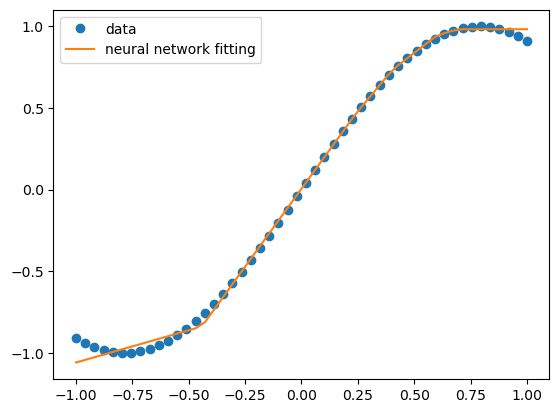

loss x is 2.089908e-02


In [23]:
# Change the mean squared loss to L1Loss function 
x = 1.0
arr2 = np.array([])
print("arr2",arr2)
for i in range (5):
    loss = prob1b(x,10000)
    loss = format(loss, 'e')
    print("loss x is",loss)
    arr2 = np.append(arr2,loss)
    x = x/10

In [24]:
print("arr2 L1Loss function  MSE is",arr2)

arr2 L1Loss function  MSE is ['7.121208e-01' '6.167202e-02' '5.387740e-03' '3.679330e-03'
 '2.089908e-02']


In [25]:
print("arr1 MSELoss: mean squared loss  function  MSE is",arr1)
print("arr2 L1Loss function  l1loss is",arr2)

arr1 MSELoss: mean squared loss  function  MSE is [5.99038839e-01 8.16419197e-04 2.98068371e-05 2.45978699e-05
 2.83263653e-04]
arr2 L1Loss function  l1loss is ['7.121208e-01' '6.167202e-02' '5.387740e-03' '3.679330e-03'
 '2.089908e-02']


### MSE function produces smaller values for this problem
for .001 Mse 1.39477543e-05
<br> for .001 L1 3.437284e-03

In [26]:
###
# 
def prob1NoPrint(learning_rate,iteration):
    print("Learning rate is",learning_rate)
    
    # initialize an object
    fnn2 = FNNTwoHiddenLayer()

    # MSELoss: mean squared loss
    criterion = torch.nn.MSELoss()

    # optimization algorithm
    # SGD: gradient desent
    # lr: learning rate
    # optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.001)

    # Parameter, in its raw form, is a tensor i.e. a multi dimensional matrix. It sub-classes the Variable class. 
    lr = learning_rate
    optimizer = torch.optim.Adam(fnn2.parameters(), lr)

    # epoch: number of iterations in optimization algorithm
    total_epoch = iteration

    # record time
    time_start = time.time()
    
    for epoch in range(total_epoch):

        # initialize gradient to be zero in the optimization algorithm
        optimizer.zero_grad()

        # compute the loss function
        loss = criterion(fnn2(x_data), y_data)

        # compute the gradient of the loss function: \nabla loss(w,b)
        loss.backward()

        # w_(n+1) = w_n - eta * \nabla loss(w_n)
        optimizer.step()

       # if epoch%1000 == 0:
           # time_end = time.time()
            #print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))
    
    time_end = time.time()
    print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))
    # plot
    plt.figure()
    plt.plot(x_data, y_data, 'o', label='data')
    plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
    plt.legend()
    plt.show()
    return loss.item()

In [27]:

def prob1c():
    itr = 100000
    learn_rate =0.001
    track = np.array([])
    for i in range (2):
        print("itration is",itr)
        loss = prob1NoPrint(learn_rate,itr)
        track = np.append(track,loss)
        itr = itr*10
    return track
tracking = prob1c()

itration is 100000
Learning rate is 0.001


KeyboardInterrupt: 

In [42]:
print("track loss is",tracking)

track loss is [5.32775339e-05 5.18283332e-06]


Learning rate is 0.001
epoch: 9999999; MSE: 1.31e-05; elapsed time: 7568.99 sec


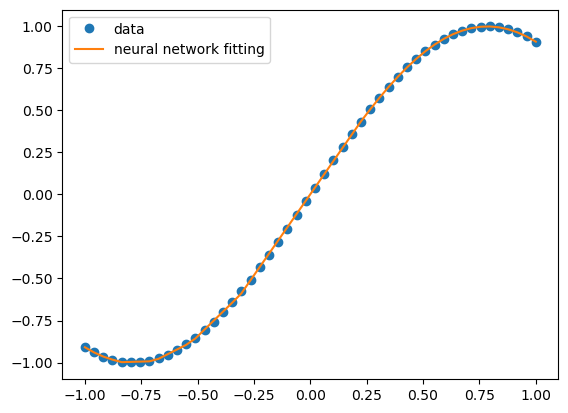

In [39]:

def prob1cBig():
    itr = 10000000
    learn_rate =0.001
    track = np.array([])
    loss = prob1NoPrint(learn_rate,itr)
    track = np.append(track,loss)
    #itr = itr*10
    return track
track2 = np.array([])
track2 = prob1cBig()

In [43]:
# 
print("")
print("track loss is ,e5 100,000,e6 1,000,000",tracking)
print("Iteration e7,10,000,000 size is",track2)


track loss is ,e5,e6 [5.32775339e-05 5.18283332e-06]
Iteration e7,10,000,000 size is [1.30676617e-05]


### learn rate = 0.001 useing MSE
#### track loss is ,e5,e6 [5.32775339e-05 5.18283332e-06]
#### Iteration e7,10,000,000 size is [1.30676617e-05]

### Problem 2

Run the code for feedforward neural network with arbitrary number of hidden layers and make the following change.

1. Change the number of layers to 2, 4, 6, 8. Report and explain your results. 

2. Change the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time

# feedforward neural network with arbitrary number of layers
class FNN(torch.nn.Module):
    
    def __init__(self, input_size, output_size, num_layers, hidden_size, activiation):
        super(FNN, self).__init__()
        
        # dimension of the input data: x
        self.input_size = input_size
        
        # dimension of the output data: y
        self.output_size = output_size
        
        # number of layers
        self.num_layers = num_layers
        
        # number of neurons in the hidden layers
        self.hidden_size = hidden_size
        
        # activation functions
        self.activiation = activiation
        
        # first hidden layer
        self.layers = torch.nn.ModuleList([torch.nn.Linear(input_size, hidden_size)])
        # hidden layers inside the neural network
        self.layers.extend([torch.nn.Linear(hidden_size, hidden_size) for i in range(1, self.num_layers-1)])
        # output layer
        self.layers.append(torch.nn.Linear(hidden_size, output_size))
        
        # activation function list: relu, tanh
        self.act_list = {'relu': torch.nn.ReLU(), 'tanh': torch.nn.Tanh()}
        self.act_func = self.act_list[self.activiation]
    
    def forward(self, x):
        
        # input layer
        z = x
        
        for i in range(self.num_layers):
            
            if i < (self.num_layers-1):
                # hidden layer
                # linear layer: z = W_i * z + b_i
                z = self.layers[i](z)
                # nonlinear layer: z = sigma(z)
                z = self.act_func(z)
            
            else:
                # output layer
                # linear layer: z = W_i * z + b_i
                z = self.layers[i](z)
                
        return z

In [45]:
###

def prob2(layer,neuron):
    fcn = FNN(input_size=1, output_size=1, num_layers=layer, hidden_size=neuron, activiation='relu')

    criterion = torch.nn.MSELoss()

    optimizer = torch.optim.Adam(fcn.parameters(), lr=0.001)

    total_epoch = 10000

    # record time
    time_start = time.time()
    for epoch in range(total_epoch):
        # 
        optimizer.zero_grad()

        loss = criterion(fcn(x_data), y_data)

        loss.backward()

        optimizer.step()

        if epoch%1000 == 0:
            time_end = time.time()
            print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))
    print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))
    # plot
    plt.figure()
    plt.plot(x_data, y_data, 'o', label='data')
    plt.plot(x_data, fcn(x_data).detach(), '-', label='neural network fitting')
    plt.legend()
    plt.show()   
    return loss.item()

Change the number of layers to 2, 4, 6, 8. Report and explain your results. 
Layer is 2
Nueron is 32
epoch: 0; MSE: 7.03e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 3.00e-03; elapsed time: 0.40 sec
epoch: 2000; MSE: 7.97e-04; elapsed time: 0.85 sec
epoch: 3000; MSE: 2.51e-04; elapsed time: 1.26 sec
epoch: 4000; MSE: 9.03e-05; elapsed time: 1.67 sec
epoch: 5000; MSE: 4.35e-05; elapsed time: 2.07 sec
epoch: 6000; MSE: 2.97e-05; elapsed time: 2.47 sec
epoch: 7000; MSE: 2.46e-05; elapsed time: 2.88 sec
epoch: 8000; MSE: 2.09e-05; elapsed time: 3.28 sec
epoch: 9000; MSE: 1.76e-05; elapsed time: 3.69 sec
epoch: 9999; MSE: 1.49e-05; elapsed time: 3.69 sec


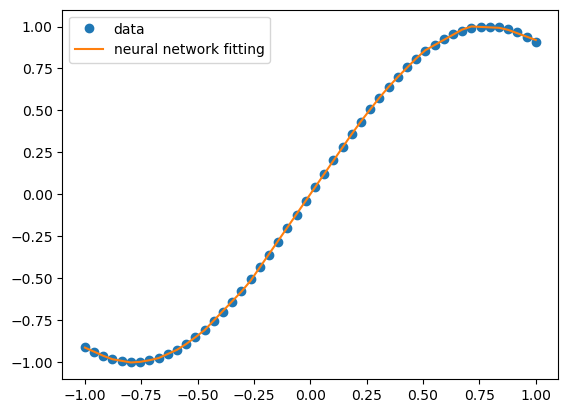

Layer is 4
Nueron is 32
epoch: 0; MSE: 6.18e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 1.12e-05; elapsed time: 0.80 sec
epoch: 2000; MSE: 4.15e-06; elapsed time: 1.63 sec
epoch: 3000; MSE: 3.08e-06; elapsed time: 2.47 sec
epoch: 4000; MSE: 2.35e-06; elapsed time: 3.24 sec
epoch: 5000; MSE: 2.02e-06; elapsed time: 4.01 sec
epoch: 6000; MSE: 1.84e-06; elapsed time: 4.81 sec
epoch: 7000; MSE: 1.01e-05; elapsed time: 5.65 sec
epoch: 8000; MSE: 1.48e-06; elapsed time: 6.48 sec
epoch: 9000; MSE: 1.34e-06; elapsed time: 7.30 sec
epoch: 9999; MSE: 1.22e-06; elapsed time: 7.30 sec


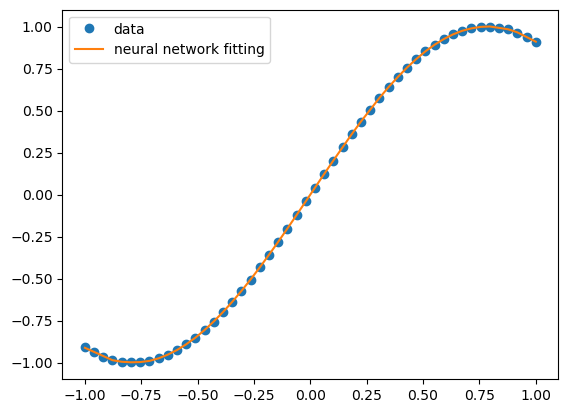

Layer is 8
Nueron is 32
epoch: 0; MSE: 6.00e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 9.55e-06; elapsed time: 1.53 sec
epoch: 2000; MSE: 3.59e-06; elapsed time: 3.00 sec
epoch: 3000; MSE: 2.13e-06; elapsed time: 4.59 sec
epoch: 4000; MSE: 2.71e-06; elapsed time: 6.12 sec
epoch: 5000; MSE: 8.11e-07; elapsed time: 7.52 sec
epoch: 6000; MSE: 6.86e-07; elapsed time: 8.98 sec
epoch: 7000; MSE: 3.98e-07; elapsed time: 10.41 sec
epoch: 8000; MSE: 4.98e-07; elapsed time: 11.88 sec
epoch: 9000; MSE: 1.63e-06; elapsed time: 13.37 sec
epoch: 9999; MSE: 5.65e-05; elapsed time: 13.37 sec


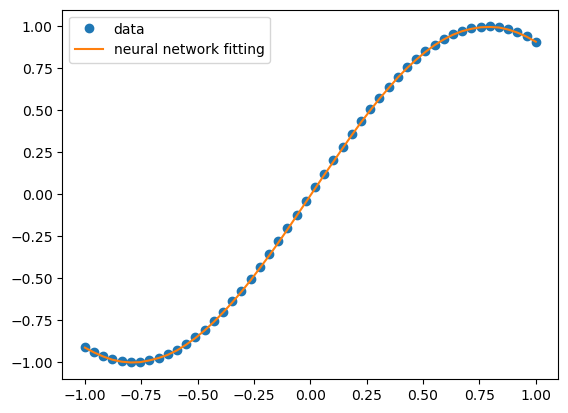

Layer is 16
Nueron is 32
epoch: 0; MSE: 6.00e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 1.35e-04; elapsed time: 2.99 sec
epoch: 2000; MSE: 4.46e-05; elapsed time: 5.96 sec
epoch: 3000; MSE: 5.74e-06; elapsed time: 9.14 sec
epoch: 4000; MSE: 1.02e-04; elapsed time: 12.00 sec
epoch: 5000; MSE: 5.72e-06; elapsed time: 14.90 sec
epoch: 6000; MSE: 1.64e-06; elapsed time: 17.75 sec
epoch: 7000; MSE: 7.20e-05; elapsed time: 20.56 sec
epoch: 8000; MSE: 3.36e-06; elapsed time: 23.53 sec
epoch: 9000; MSE: 1.30e-06; elapsed time: 26.58 sec
epoch: 9999; MSE: 6.09e-07; elapsed time: 26.58 sec


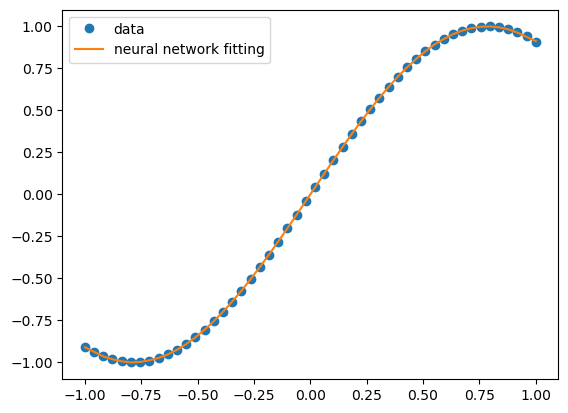

In [47]:


arr4 = np.array([])
layer = 2
nueron = 32
print("Change the number of layers to 2, 4, 6, 8. Report and explain your results. ")
for i in range (4):
    print("Layer is",layer)
    print("Nueron is",nueron)
    loss = prob2(layer,nueron)
    arr4 = np.append(arr4,loss)
    layer += layer

Change the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.
Layer is 6
Nueron is 8
epoch: 0; MSE: 6.03e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 3.67e-04; elapsed time: 1.11 sec
epoch: 2000; MSE: 2.10e-04; elapsed time: 2.27 sec
epoch: 3000; MSE: 1.14e-05; elapsed time: 3.37 sec
epoch: 4000; MSE: 1.05e-05; elapsed time: 4.44 sec
epoch: 5000; MSE: 9.93e-06; elapsed time: 5.49 sec
epoch: 6000; MSE: 9.37e-06; elapsed time: 6.52 sec
epoch: 7000; MSE: 8.24e-06; elapsed time: 7.57 sec
epoch: 8000; MSE: 6.55e-06; elapsed time: 8.66 sec
epoch: 9000; MSE: 8.45e-06; elapsed time: 9.75 sec
epoch: 9999; MSE: 6.03e-06; elapsed time: 9.75 sec


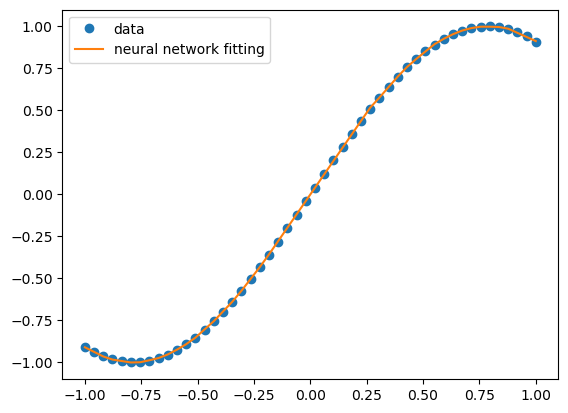

Layer is 6
Nueron is 16
epoch: 0; MSE: 6.04e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 1.31e-05; elapsed time: 1.09 sec
epoch: 2000; MSE: 7.29e-06; elapsed time: 2.20 sec
epoch: 3000; MSE: 6.30e-06; elapsed time: 3.32 sec
epoch: 4000; MSE: 7.52e-06; elapsed time: 4.45 sec
epoch: 5000; MSE: 3.34e-06; elapsed time: 5.58 sec
epoch: 6000; MSE: 6.27e-06; elapsed time: 6.76 sec
epoch: 7000; MSE: 1.07e-06; elapsed time: 7.88 sec
epoch: 8000; MSE: 3.61e-06; elapsed time: 8.98 sec
epoch: 9000; MSE: 8.92e-07; elapsed time: 10.04 sec
epoch: 9999; MSE: 9.36e-07; elapsed time: 10.04 sec


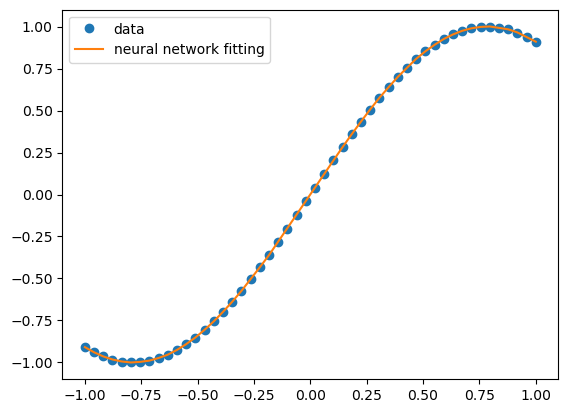

Layer is 6
Nueron is 32
epoch: 0; MSE: 6.41e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 1.79e-04; elapsed time: 1.12 sec
epoch: 2000; MSE: 2.17e-05; elapsed time: 2.27 sec
epoch: 3000; MSE: 2.51e-06; elapsed time: 3.43 sec
epoch: 4000; MSE: 5.13e-07; elapsed time: 4.58 sec
epoch: 5000; MSE: 6.51e-06; elapsed time: 5.70 sec
epoch: 6000; MSE: 3.48e-07; elapsed time: 6.84 sec
epoch: 7000; MSE: 2.27e-07; elapsed time: 7.95 sec
epoch: 8000; MSE: 3.95e-05; elapsed time: 9.12 sec
epoch: 9000; MSE: 2.68e-05; elapsed time: 10.25 sec
epoch: 9999; MSE: 1.30e-07; elapsed time: 10.25 sec


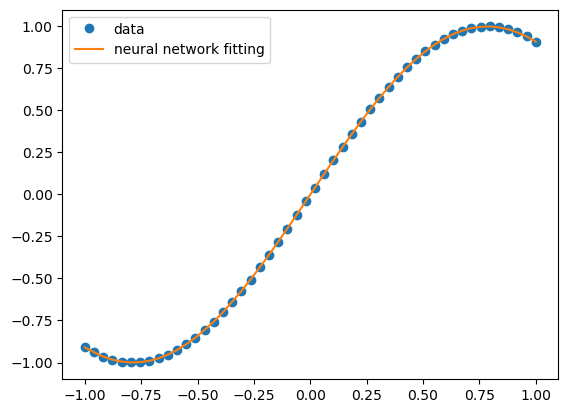

Layer is 6
Nueron is 64
epoch: 0; MSE: 6.22e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 3.88e-06; elapsed time: 1.39 sec
epoch: 2000; MSE: 5.18e-05; elapsed time: 2.67 sec
epoch: 3000; MSE: 9.69e-07; elapsed time: 3.95 sec
epoch: 4000; MSE: 1.56e-06; elapsed time: 5.29 sec
epoch: 5000; MSE: 1.34e-06; elapsed time: 6.70 sec
epoch: 6000; MSE: 2.12e-07; elapsed time: 8.08 sec
epoch: 7000; MSE: 1.52e-05; elapsed time: 9.43 sec
epoch: 8000; MSE: 1.76e-07; elapsed time: 10.80 sec
epoch: 9000; MSE: 4.81e-08; elapsed time: 12.16 sec
epoch: 9999; MSE: 2.96e-06; elapsed time: 12.16 sec


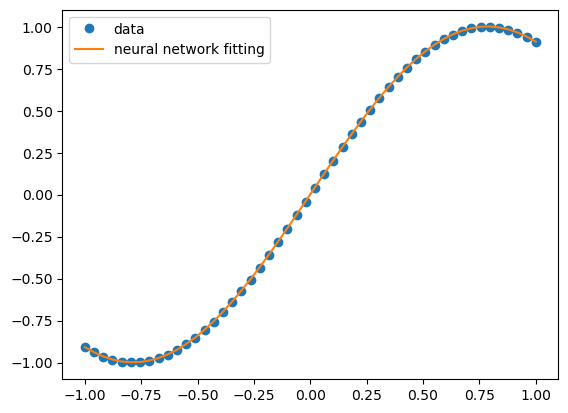

In [49]:
arr5 = np.array([])
layer = 6
nueron = 8
print("Change the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.")
for i in range (4):
    print("Layer is",layer)
    print("Nueron is",nueron)
    loss =prob2(layer,nueron)
    arr5 = np.append(arr5,loss)
    nueron *= 2

In [59]:
print("Change the number of layers to 2, 4, 6, 8. Report and explain your results. \n")
print("kept neurons at 32, change layers to 2 4 6 8,loss is",arr4)
print("\nChange the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.\n")
print("kept layers at 6,change layer to 8 16 32 64,loss is ",arr5)

Change the number of layers to 2, 4, 6, 8. Report and explain your results. 

kept neurons at 32, change layers to 2 4 6 8,loss is [1.49170801e-05 1.22080530e-06 5.64734182e-05 6.09119468e-07]

Change the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.

kept layers at 6,change layer to 8 16 32 64,loss is  [6.02756381e-06 9.36347931e-07 1.30182002e-07 2.96148846e-06]


Change the number of layers to 2, 4, 6, 8. Report and explain your results.  
### 8 layers works best with 32 neurons
<br> Change the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.
### 32 neurons works best with 6 layers

### Problem 3

Run the code for feedforward neural network with 2 hidden layers. Change the number of data points to be 10000 and the function to be approximated to
$y = \sin(n x)$ with $n=1,10,100$. (Hint: change the line: N = 50 y_data = torch.sin(2*x_data))

1. Change the number of layers to 2, 4, 6, 8. Report and explain your results. 

2. Change the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.


In [98]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
# feedforward neural network with 2 hidden layers
### PROBABLY better way than useing if statements 
# or just copying self.layers.extend([torch.nn.Linear(hidden_size, hidden_size) for i in range(1, self.num_layers-1)])
class FNNTwoHiddenLayerChanged(torch.nn.Module):
    num_layers = 0
    print("number of layers class",num_layers)
    hidden_size = 0
    def __init__(self,num_layers,hidden_size):
        super(FNNTwoHiddenLayerChanged, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.hidden_layer1 = torch.nn.Linear(1, hidden_size)
        ## Assume not supoused to copy this
        #self.layers.extend([torch.nn.Linear(hidden_size, hidden_size) for i in range(1, self.num_layers-1)])
        self.hidden_layer2 = torch.nn.Linear(hidden_size, hidden_size)
        print("number of layers init",num_layers)
        # works for 2,4 6,8
        if(num_layers >= 4):
            print("number of layers 4",num_layers)
            self.hidden_layer3 = torch.nn.Linear(hidden_size, hidden_size)
            self.hidden_layer4 = torch.nn.Linear(hidden_size, hidden_size)
        if(num_layers >= 6):
            print("number of layers 6",num_layers)
            self.hidden_layer5 = torch.nn.Linear(hidden_size, hidden_size)
            self.hidden_layer6 = torch.nn.Linear(hidden_size, hidden_size)
        if(num_layers >= 8):
            print("number of layers 8",num_layers)
            self.hidden_layer7 = torch.nn.Linear(hidden_size, hidden_size)
            self.hidden_layer8 = torch.nn.Linear(hidden_size, hidden_size)
        self.output_layer  = torch.nn.Linear(hidden_size, 1)

                    
    def forward(self, x):
        # input layer
        z = x
        
        # hidden layer 1
        # z = W_1 * z + b_1
        # W_1: 10 * 1
        # b_1: 10 * 1
        z = self.hidden_layer1(z)
        # z = ReLU(z)
        z = torch.nn.functional.relu(z)

        # hidden layer 2
        # z = W_2 * z + b_2
        # W_2: 10 * 10
        # b_2: 10 * 1        
        z = self.hidden_layer2(z)
        # z = ReLU(z)
        z = torch.nn.functional.relu(z)
        # works for 2,4 6,8
        if(self.num_layers >= 4):
            #print("number of layers is at least 4",self.num_layers)
            z = self.hidden_layer3(z)
            z = torch.nn.functional.relu(z)
            z = self.hidden_layer4(z)
            z = torch.nn.functional.relu(z)
        if(self.num_layers >= 6):
            #print("number of layers is at least  6",self.num_layers)
            z = self.hidden_layer5(z)
            z = torch.nn.functional.relu(z)
            z = self.hidden_layer6(z)
            z = torch.nn.functional.relu(z)
        if(self.num_layers >= 8):
            #print("number of layers is at least  8",self.num_layers)
            z = self.hidden_layer7(z)
            z = torch.nn.functional.relu(z)
            z = self.hidden_layer8(z)
            z = torch.nn.functional.relu(z)
        
        
        
        # output layer
        # z = W_3 * z + b_3
        # W_3: 1 * 10
        # b_3: 1
        z = self.output_layer(z)
        
        # z: 1
        return z



number of layers class 0


In [99]:
###
#  Changes the FNNTwoHiddenLayerChanged object to match the changes in changes in layers or nuerons
def prob3a(learning_rate,iteration,layers,neurons):
    print("Learning rate is",learning_rate)
    print("iteration  is",iteration)
    # initialize an object
    fnn2 = FNNTwoHiddenLayerChanged(layers,neurons)

    # MSELoss: mean squared loss
    criterion = torch.nn.MSELoss()

    # optimization algorithm
    # SGD: gradient desent
    # lr: learning rate
    # optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.001)

    # Parameter, in its raw form, is a tensor i.e. a multi dimensional matrix. It sub-classes the Variable class. 
    lr = learning_rate
    optimizer = torch.optim.Adam(fnn2.parameters(), lr)

    # epoch: number of iterations in optimization algorithm
    total_epoch = iteration

    # record time
    time_start = time.time()
    
    for epoch in range(total_epoch):

        # initialize gradient to be zero in the optimization algorithm
        optimizer.zero_grad()

        # compute the loss function
        loss = criterion(fnn2(x_data), y_data)

        # compute the gradient of the loss function: \nabla loss(w,b)
        loss.backward()

        # w_(n+1) = w_n - eta * \nabla loss(w_n)
        optimizer.step()

        if epoch%1000 == 0:
            time_end = time.time()
            print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))
    
    print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))
    # plot
    plt.figure()
    plt.plot(x_data, y_data, 'o', label='data')
    plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
    plt.legend()
    plt.show()
    return loss.item()

In [100]:
# prob3 changes for the N amount
# changes the amount of layers or nuerons by calling prob3a which changes the FNNTwoHiddenLayerChanged object
def prob3(Data_points,constant_n):
    DN = Data_points
    n = constant_n
    print("n is:",n)
    xn_data = torch.linspace(-1, 1, DN)
    xn_data = torch.reshape(xn_data, (DN, 1))
    yn_data = torch.sin(n*xn_data)
    plt.figure()
    plt.plot(xn_data, yn_data, 'o', label='data')
    plt.legend()
    plt.show()
    layers = 2
    nuerons = 10
    print("Change the number of layers to 2, 4, 6, 8. Report and explain your results. ")
    arr6 = np.array([])
    for i in range(4):
        print("nuerons is ",nuerons)
        print("layers is now at",layers)
        loss = prob3a(0.001,10000,layers,nuerons)
        arr6 = np.append(arr6,loss)
        layers +=2
    layers = 2
    nuerons = 8
    arr7 = np.array([])
    print("Change the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.")
    for j in range(4):
        print("nuerons is now",nuerons)
        print("layers is",layers)
        loss = prob3a(0.001,10000,layers,nuerons)
        arr7 = np.append(arr7,loss)
        nuerons *=2
    return arr6,arr7
      

n is: 1
n is: 1


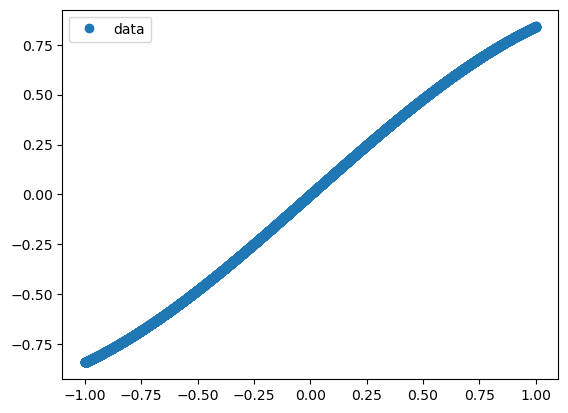

Change the number of layers to 2, 4, 6, 8. Report and explain your results. 
nuerons is  10
layers is now at 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 5.73e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 5.54e-03; elapsed time: 0.59 sec
epoch: 2000; MSE: 1.55e-03; elapsed time: 1.16 sec
epoch: 3000; MSE: 7.35e-04; elapsed time: 1.75 sec
epoch: 4000; MSE: 5.87e-04; elapsed time: 2.34 sec
epoch: 5000; MSE: 5.87e-04; elapsed time: 2.92 sec
epoch: 6000; MSE: 5.87e-04; elapsed time: 3.52 sec
epoch: 7000; MSE: 5.86e-04; elapsed time: 4.11 sec
epoch: 8000; MSE: 5.86e-04; elapsed time: 4.71 sec
epoch: 9000; MSE: 5.86e-04; elapsed time: 5.32 sec
epoch: 9999; MSE: 5.86e-04; elapsed time: 5.32 sec


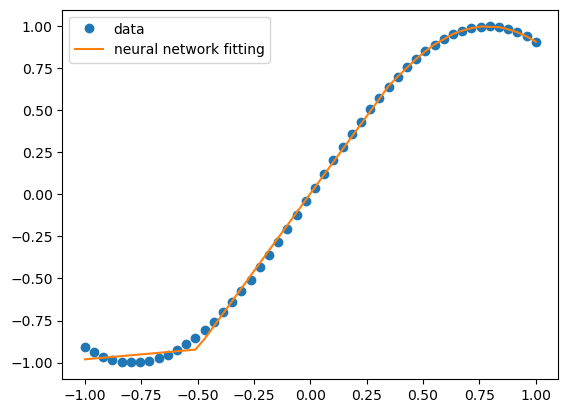

nuerons is  10
layers is now at 4
Learning rate is 0.001
iteration  is 10000
number of layers init 4
number of layers 4 4
epoch: 0; MSE: 6.01e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 2.07e-05; elapsed time: 0.91 sec
epoch: 2000; MSE: 1.53e-05; elapsed time: 1.82 sec
epoch: 3000; MSE: 1.26e-05; elapsed time: 2.73 sec
epoch: 4000; MSE: 1.09e-05; elapsed time: 3.66 sec
epoch: 5000; MSE: 8.62e-06; elapsed time: 4.60 sec
epoch: 6000; MSE: 7.23e-06; elapsed time: 5.51 sec
epoch: 7000; MSE: 6.21e-06; elapsed time: 6.39 sec
epoch: 8000; MSE: 5.24e-06; elapsed time: 7.27 sec
epoch: 9000; MSE: 4.72e-06; elapsed time: 8.17 sec
epoch: 9999; MSE: 4.60e-06; elapsed time: 8.17 sec


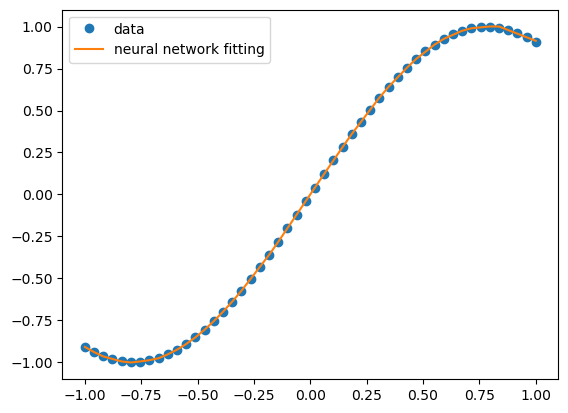

nuerons is  10
layers is now at 6
Learning rate is 0.001
iteration  is 10000
number of layers init 6
number of layers 4 6
number of layers 6 6
epoch: 0; MSE: 6.05e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 1.72e-04; elapsed time: 1.19 sec
epoch: 2000; MSE: 1.77e-05; elapsed time: 2.43 sec
epoch: 3000; MSE: 4.36e-06; elapsed time: 3.67 sec
epoch: 4000; MSE: 3.57e-06; elapsed time: 4.85 sec
epoch: 5000; MSE: 5.17e-06; elapsed time: 6.06 sec
epoch: 6000; MSE: 3.39e-06; elapsed time: 7.23 sec
epoch: 7000; MSE: 4.19e-06; elapsed time: 8.46 sec
epoch: 8000; MSE: 3.54e-06; elapsed time: 9.73 sec
epoch: 9000; MSE: 6.90e-06; elapsed time: 10.94 sec
epoch: 9999; MSE: 6.88e-06; elapsed time: 10.94 sec


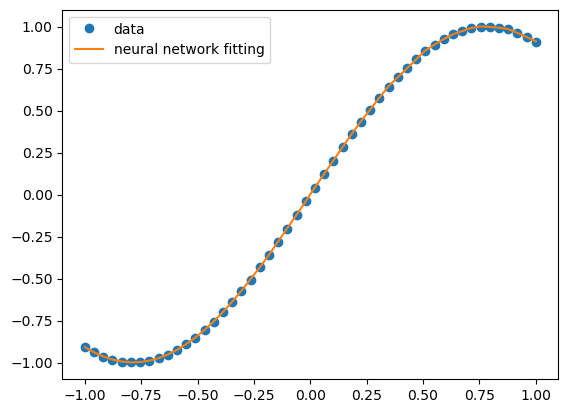

nuerons is  10
layers is now at 8
Learning rate is 0.001
iteration  is 10000
number of layers init 8
number of layers 4 8
number of layers 6 8
number of layers 8 8
epoch: 0; MSE: 6.37e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 1.59e-04; elapsed time: 1.61 sec
epoch: 2000; MSE: 4.23e-06; elapsed time: 3.16 sec
epoch: 3000; MSE: 3.76e-06; elapsed time: 4.69 sec
epoch: 4000; MSE: 1.93e-06; elapsed time: 6.31 sec
epoch: 5000; MSE: 2.46e-06; elapsed time: 7.89 sec
epoch: 6000; MSE: 1.36e-06; elapsed time: 9.38 sec
epoch: 7000; MSE: 1.75e-06; elapsed time: 10.87 sec
epoch: 8000; MSE: 1.18e-06; elapsed time: 12.43 sec
epoch: 9000; MSE: 2.64e-06; elapsed time: 14.01 sec
epoch: 9999; MSE: 1.40e-06; elapsed time: 14.01 sec


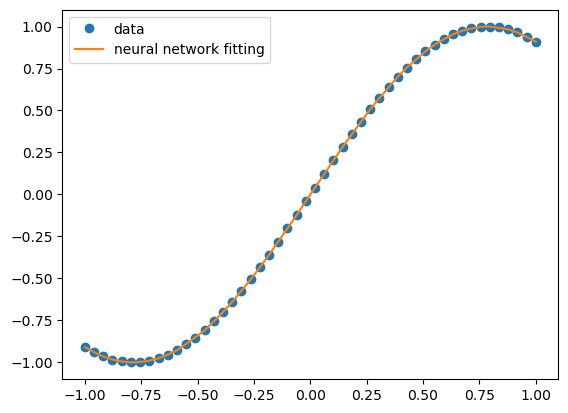

Change the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.
nuerons is now 8
layers is 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 6.30e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 2.98e-03; elapsed time: 0.61 sec
epoch: 2000; MSE: 1.38e-03; elapsed time: 1.22 sec
epoch: 3000; MSE: 4.37e-04; elapsed time: 1.85 sec
epoch: 4000; MSE: 1.35e-04; elapsed time: 2.47 sec
epoch: 5000; MSE: 5.82e-05; elapsed time: 3.04 sec
epoch: 6000; MSE: 3.78e-05; elapsed time: 3.65 sec
epoch: 7000; MSE: 2.93e-05; elapsed time: 4.25 sec
epoch: 8000; MSE: 2.75e-05; elapsed time: 4.83 sec
epoch: 9000; MSE: 2.70e-05; elapsed time: 5.47 sec
epoch: 9999; MSE: 2.67e-05; elapsed time: 5.47 sec


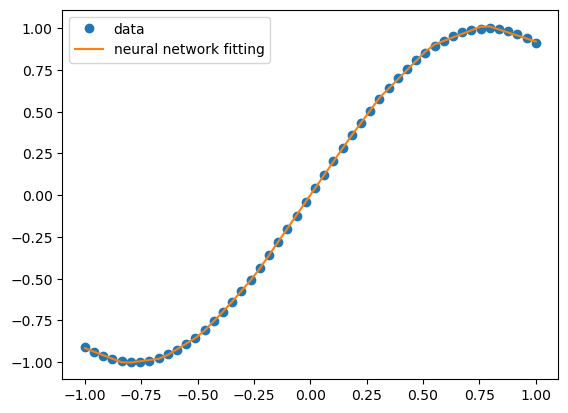

nuerons is now 16
layers is 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 5.97e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 9.17e-04; elapsed time: 0.59 sec
epoch: 2000; MSE: 3.23e-04; elapsed time: 1.19 sec
epoch: 3000; MSE: 1.03e-04; elapsed time: 1.78 sec
epoch: 4000; MSE: 4.22e-05; elapsed time: 2.43 sec
epoch: 5000; MSE: 2.69e-05; elapsed time: 3.07 sec
epoch: 6000; MSE: 1.70e-05; elapsed time: 3.70 sec
epoch: 7000; MSE: 1.09e-05; elapsed time: 4.31 sec
epoch: 8000; MSE: 1.04e-05; elapsed time: 4.92 sec
epoch: 9000; MSE: 1.00e-05; elapsed time: 5.51 sec
epoch: 9999; MSE: 1.54e-05; elapsed time: 5.51 sec


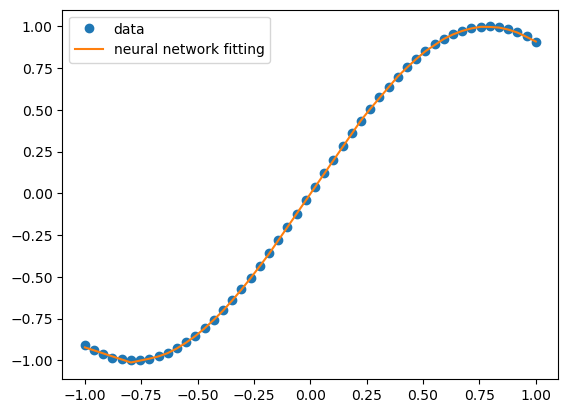

nuerons is now 32
layers is 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 6.63e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 6.94e-04; elapsed time: 0.65 sec
epoch: 2000; MSE: 1.23e-04; elapsed time: 1.25 sec
epoch: 3000; MSE: 2.38e-05; elapsed time: 1.86 sec
epoch: 4000; MSE: 6.58e-06; elapsed time: 2.45 sec
epoch: 5000; MSE: 2.99e-06; elapsed time: 3.09 sec
epoch: 6000; MSE: 2.16e-06; elapsed time: 3.75 sec
epoch: 7000; MSE: 3.60e-05; elapsed time: 4.38 sec
epoch: 8000; MSE: 1.70e-06; elapsed time: 5.00 sec
epoch: 9000; MSE: 1.63e-06; elapsed time: 5.61 sec
epoch: 9999; MSE: 1.59e-06; elapsed time: 5.61 sec


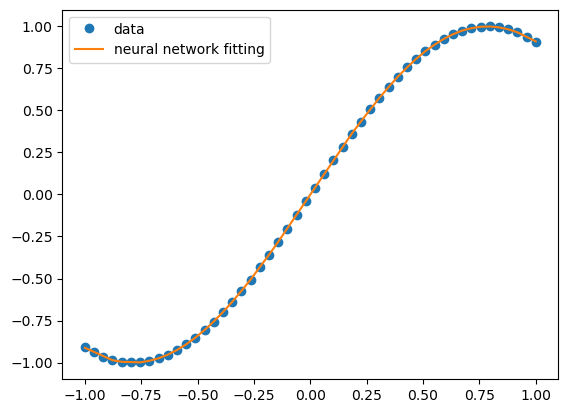

nuerons is now 64
layers is 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 6.57e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 2.17e-05; elapsed time: 0.67 sec
epoch: 2000; MSE: 1.39e-06; elapsed time: 1.32 sec
epoch: 3000; MSE: 6.70e-07; elapsed time: 2.00 sec
epoch: 4000; MSE: 4.84e-07; elapsed time: 2.68 sec
epoch: 5000; MSE: 4.42e-07; elapsed time: 3.34 sec
epoch: 6000; MSE: 4.16e-07; elapsed time: 4.01 sec
epoch: 7000; MSE: 5.86e-07; elapsed time: 4.69 sec
epoch: 8000; MSE: 3.80e-07; elapsed time: 5.38 sec
epoch: 9000; MSE: 3.65e-07; elapsed time: 6.11 sec
epoch: 9999; MSE: 4.70e-07; elapsed time: 6.11 sec


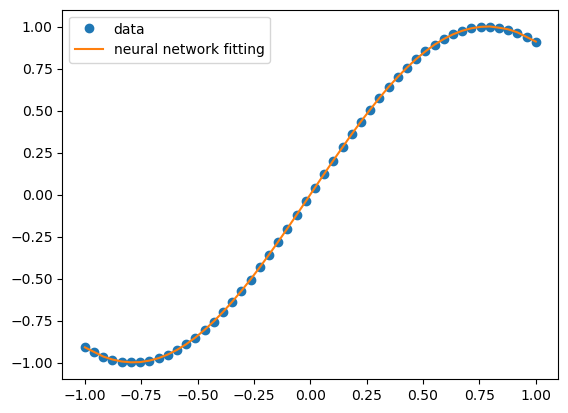

n is: 10
n is: 10


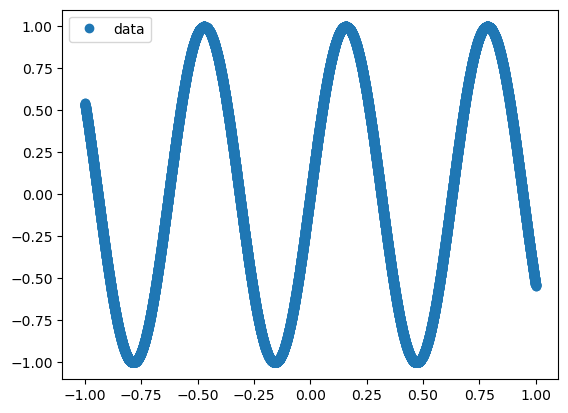

Change the number of layers to 2, 4, 6, 8. Report and explain your results. 
nuerons is  10
layers is now at 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 6.04e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 1.75e-03; elapsed time: 0.61 sec
epoch: 2000; MSE: 5.11e-04; elapsed time: 1.20 sec
epoch: 3000; MSE: 2.28e-04; elapsed time: 1.80 sec
epoch: 4000; MSE: 9.72e-05; elapsed time: 2.42 sec
epoch: 5000; MSE: 4.10e-05; elapsed time: 3.01 sec
epoch: 6000; MSE: 1.82e-05; elapsed time: 3.60 sec
epoch: 7000; MSE: 1.15e-05; elapsed time: 4.19 sec
epoch: 8000; MSE: 9.55e-06; elapsed time: 4.83 sec
epoch: 9000; MSE: 8.63e-06; elapsed time: 5.48 sec
epoch: 9999; MSE: 1.02e-05; elapsed time: 5.48 sec


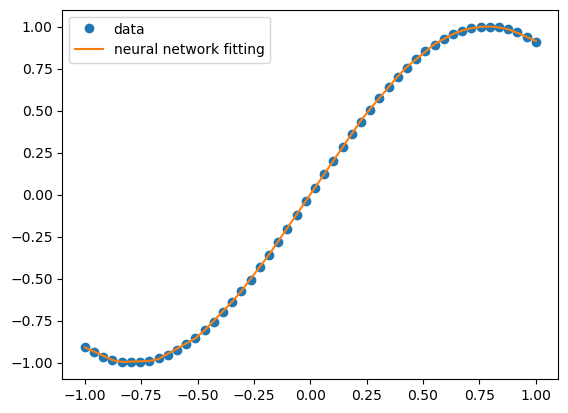

nuerons is  10
layers is now at 4
Learning rate is 0.001
iteration  is 10000
number of layers init 4
number of layers 4 4
epoch: 0; MSE: 6.09e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 4.02e-05; elapsed time: 0.96 sec
epoch: 2000; MSE: 2.40e-05; elapsed time: 1.92 sec
epoch: 3000; MSE: 2.21e-05; elapsed time: 2.80 sec
epoch: 4000; MSE: 2.15e-05; elapsed time: 3.70 sec
epoch: 5000; MSE: 1.34e-05; elapsed time: 4.60 sec
epoch: 6000; MSE: 1.11e-05; elapsed time: 5.53 sec
epoch: 7000; MSE: 1.05e-05; elapsed time: 6.40 sec
epoch: 8000; MSE: 1.04e-05; elapsed time: 7.29 sec
epoch: 9000; MSE: 6.33e-06; elapsed time: 8.17 sec
epoch: 9999; MSE: 6.12e-06; elapsed time: 8.17 sec


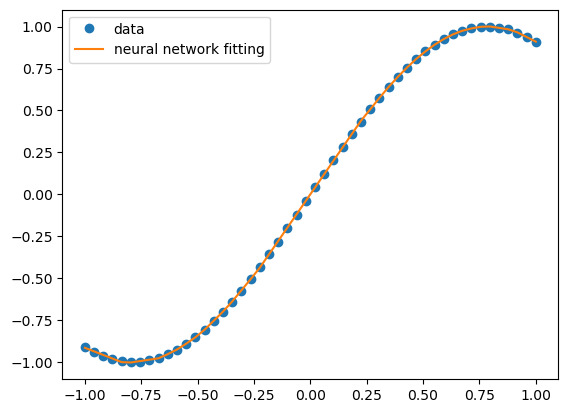

nuerons is  10
layers is now at 6
Learning rate is 0.001
iteration  is 10000
number of layers init 6
number of layers 4 6
number of layers 6 6
epoch: 0; MSE: 6.29e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 1.24e-04; elapsed time: 1.21 sec
epoch: 2000; MSE: 2.50e-05; elapsed time: 2.40 sec
epoch: 3000; MSE: 2.09e-05; elapsed time: 3.61 sec
epoch: 4000; MSE: 1.85e-05; elapsed time: 4.82 sec
epoch: 5000; MSE: 1.77e-05; elapsed time: 6.07 sec
epoch: 6000; MSE: 1.78e-05; elapsed time: 7.31 sec
epoch: 7000; MSE: 1.50e-05; elapsed time: 8.52 sec
epoch: 8000; MSE: 1.27e-05; elapsed time: 9.74 sec
epoch: 9000; MSE: 1.23e-05; elapsed time: 10.95 sec
epoch: 9999; MSE: 1.40e-05; elapsed time: 10.95 sec


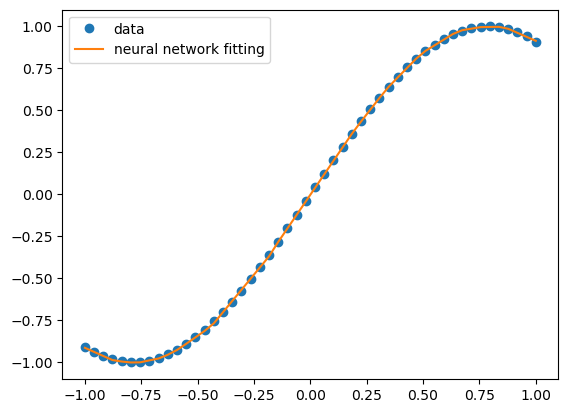

nuerons is  10
layers is now at 8
Learning rate is 0.001
iteration  is 10000
number of layers init 8
number of layers 4 8
number of layers 6 8
number of layers 8 8
epoch: 0; MSE: 6.34e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 2.28e-04; elapsed time: 1.50 sec
epoch: 2000; MSE: 6.42e-05; elapsed time: 3.07 sec
epoch: 3000; MSE: 2.83e-05; elapsed time: 4.51 sec
epoch: 4000; MSE: 1.33e-05; elapsed time: 6.01 sec
epoch: 5000; MSE: 8.15e-06; elapsed time: 7.47 sec
epoch: 6000; MSE: 7.84e-06; elapsed time: 8.96 sec
epoch: 7000; MSE: 3.99e-06; elapsed time: 10.53 sec
epoch: 8000; MSE: 1.00e-05; elapsed time: 12.11 sec
epoch: 9000; MSE: 2.19e-05; elapsed time: 13.64 sec
epoch: 9999; MSE: 3.53e-06; elapsed time: 13.64 sec


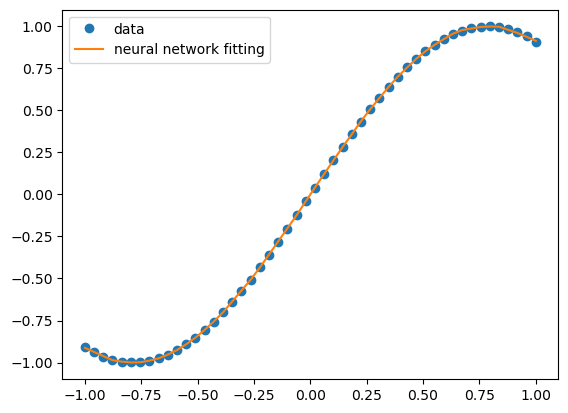

Change the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.
nuerons is now 8
layers is 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 5.79e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 3.81e-03; elapsed time: 0.59 sec
epoch: 2000; MSE: 2.82e-03; elapsed time: 1.16 sec
epoch: 3000; MSE: 2.02e-03; elapsed time: 1.77 sec
epoch: 4000; MSE: 1.37e-03; elapsed time: 2.36 sec
epoch: 5000; MSE: 8.50e-04; elapsed time: 2.92 sec
epoch: 6000; MSE: 4.53e-04; elapsed time: 3.51 sec
epoch: 7000; MSE: 2.04e-04; elapsed time: 4.09 sec
epoch: 8000; MSE: 1.00e-04; elapsed time: 4.68 sec
epoch: 9000; MSE: 5.81e-05; elapsed time: 5.29 sec
epoch: 9999; MSE: 5.30e-05; elapsed time: 5.29 sec


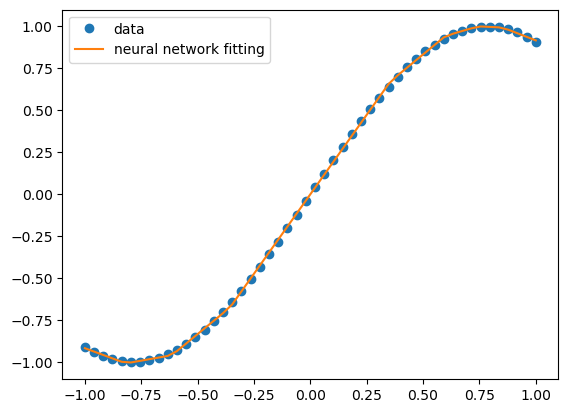

nuerons is now 16
layers is 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 7.30e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 1.11e-03; elapsed time: 0.61 sec
epoch: 2000; MSE: 3.02e-04; elapsed time: 1.18 sec
epoch: 3000; MSE: 1.41e-04; elapsed time: 1.78 sec
epoch: 4000; MSE: 6.76e-05; elapsed time: 2.34 sec
epoch: 5000; MSE: 3.91e-05; elapsed time: 2.94 sec
epoch: 6000; MSE: 2.99e-05; elapsed time: 3.53 sec
epoch: 7000; MSE: 2.71e-05; elapsed time: 4.12 sec
epoch: 8000; MSE: 2.63e-05; elapsed time: 4.76 sec
epoch: 9000; MSE: 2.60e-05; elapsed time: 5.39 sec
epoch: 9999; MSE: 2.58e-05; elapsed time: 5.39 sec


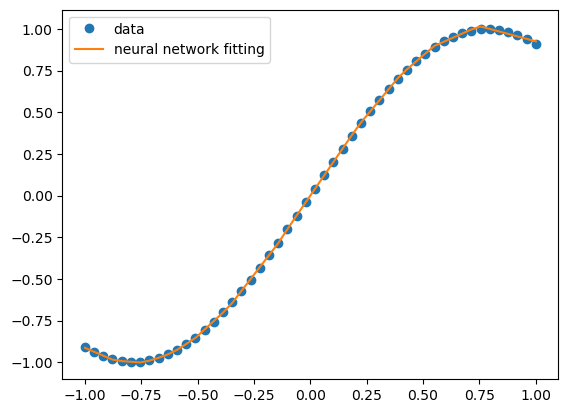

nuerons is now 32
layers is 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 6.19e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 6.60e-05; elapsed time: 0.62 sec
epoch: 2000; MSE: 1.99e-05; elapsed time: 1.23 sec
epoch: 3000; MSE: 9.15e-06; elapsed time: 1.83 sec
epoch: 4000; MSE: 6.53e-06; elapsed time: 2.45 sec
epoch: 5000; MSE: 5.45e-06; elapsed time: 3.03 sec
epoch: 6000; MSE: 4.43e-06; elapsed time: 3.64 sec
epoch: 7000; MSE: 4.50e-06; elapsed time: 4.25 sec
epoch: 8000; MSE: 4.01e-06; elapsed time: 4.83 sec
epoch: 9000; MSE: 3.92e-06; elapsed time: 5.43 sec
epoch: 9999; MSE: 3.90e-06; elapsed time: 5.43 sec


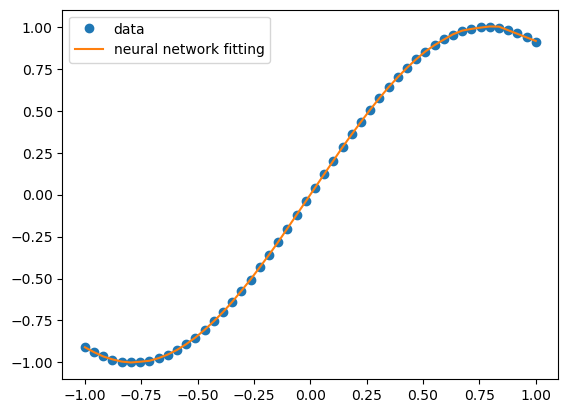

nuerons is now 64
layers is 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 4.62e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 4.63e-06; elapsed time: 0.69 sec
epoch: 2000; MSE: 1.27e-06; elapsed time: 1.37 sec
epoch: 3000; MSE: 8.49e-07; elapsed time: 2.05 sec
epoch: 4000; MSE: 4.93e-07; elapsed time: 2.70 sec
epoch: 5000; MSE: 1.49e-05; elapsed time: 3.35 sec
epoch: 6000; MSE: 4.10e-07; elapsed time: 4.01 sec
epoch: 7000; MSE: 6.89e-08; elapsed time: 4.65 sec
epoch: 8000; MSE: 2.65e-06; elapsed time: 5.32 sec
epoch: 9000; MSE: 2.57e-08; elapsed time: 5.98 sec
epoch: 9999; MSE: 1.70e-07; elapsed time: 5.98 sec


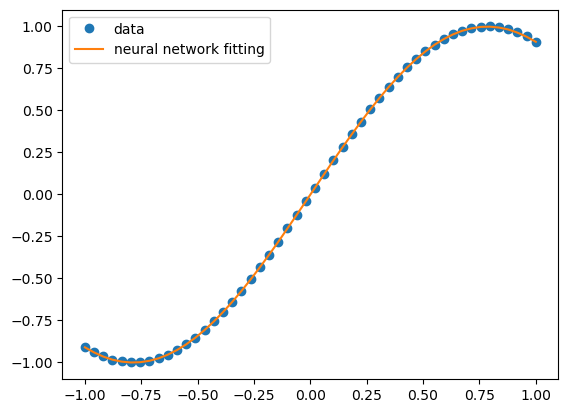

n is: 100
n is: 100


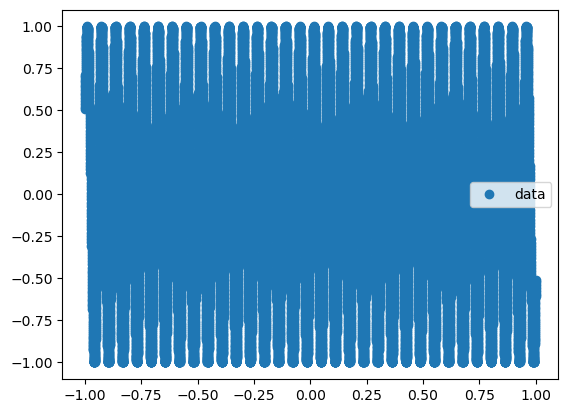

Change the number of layers to 2, 4, 6, 8. Report and explain your results. 
nuerons is  10
layers is now at 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 6.56e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 2.02e-03; elapsed time: 0.57 sec
epoch: 2000; MSE: 1.06e-03; elapsed time: 1.17 sec
epoch: 3000; MSE: 5.72e-04; elapsed time: 1.77 sec
epoch: 4000; MSE: 2.82e-04; elapsed time: 2.39 sec
epoch: 5000; MSE: 1.19e-04; elapsed time: 2.98 sec
epoch: 6000; MSE: 4.76e-05; elapsed time: 3.62 sec
epoch: 7000; MSE: 2.66e-05; elapsed time: 4.20 sec
epoch: 8000; MSE: 2.03e-05; elapsed time: 4.77 sec
epoch: 9000; MSE: 1.87e-05; elapsed time: 5.38 sec
epoch: 9999; MSE: 1.74e-05; elapsed time: 5.38 sec


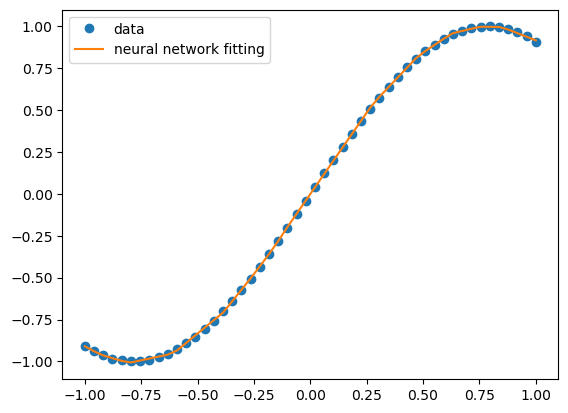

nuerons is  10
layers is now at 4
Learning rate is 0.001
iteration  is 10000
number of layers init 4
number of layers 4 4
epoch: 0; MSE: 6.27e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 4.10e-04; elapsed time: 0.88 sec
epoch: 2000; MSE: 1.36e-04; elapsed time: 1.74 sec
epoch: 3000; MSE: 4.96e-05; elapsed time: 2.66 sec
epoch: 4000; MSE: 2.96e-05; elapsed time: 3.55 sec
epoch: 5000; MSE: 2.45e-05; elapsed time: 4.43 sec
epoch: 6000; MSE: 2.29e-05; elapsed time: 5.34 sec
epoch: 7000; MSE: 2.28e-05; elapsed time: 6.24 sec
epoch: 8000; MSE: 2.16e-05; elapsed time: 7.16 sec
epoch: 9000; MSE: 1.61e-05; elapsed time: 8.05 sec
epoch: 9999; MSE: 1.36e-05; elapsed time: 8.05 sec


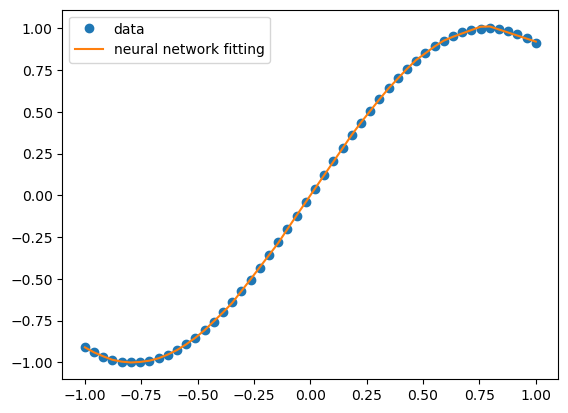

nuerons is  10
layers is now at 6
Learning rate is 0.001
iteration  is 10000
number of layers init 6
number of layers 4 6
number of layers 6 6
epoch: 0; MSE: 5.99e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 2.08e-04; elapsed time: 1.20 sec
epoch: 2000; MSE: 8.57e-06; elapsed time: 2.43 sec
epoch: 3000; MSE: 5.28e-06; elapsed time: 3.65 sec
epoch: 4000; MSE: 4.05e-06; elapsed time: 4.87 sec
epoch: 5000; MSE: 1.87e-05; elapsed time: 6.15 sec
epoch: 6000; MSE: 3.32e-06; elapsed time: 7.31 sec
epoch: 7000; MSE: 3.25e-06; elapsed time: 8.49 sec
epoch: 8000; MSE: 3.30e-06; elapsed time: 9.68 sec
epoch: 9000; MSE: 3.09e-06; elapsed time: 10.86 sec
epoch: 9999; MSE: 2.94e-06; elapsed time: 10.86 sec


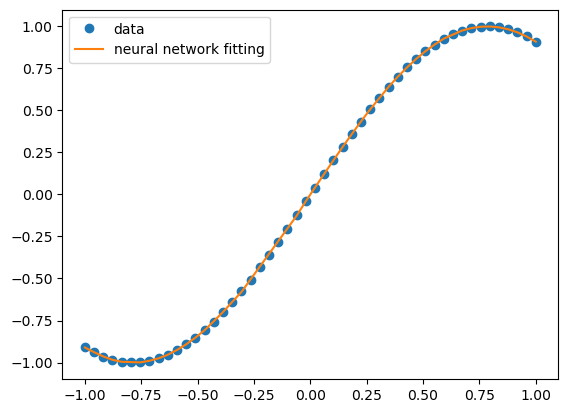

nuerons is  10
layers is now at 8
Learning rate is 0.001
iteration  is 10000
number of layers init 8
number of layers 4 8
number of layers 6 8
number of layers 8 8
epoch: 0; MSE: 7.15e-01; elapsed time: 0.02 sec
epoch: 1000; MSE: 1.56e-04; elapsed time: 1.48 sec
epoch: 2000; MSE: 1.43e-04; elapsed time: 2.98 sec
epoch: 3000; MSE: 1.33e-04; elapsed time: 4.43 sec
epoch: 4000; MSE: 6.77e-05; elapsed time: 5.94 sec
epoch: 5000; MSE: 2.22e-05; elapsed time: 7.51 sec
epoch: 6000; MSE: 1.07e-05; elapsed time: 9.08 sec
epoch: 7000; MSE: 1.78e-06; elapsed time: 10.58 sec
epoch: 8000; MSE: 1.21e-06; elapsed time: 12.12 sec
epoch: 9000; MSE: 2.06e-06; elapsed time: 13.62 sec
epoch: 9999; MSE: 7.90e-07; elapsed time: 13.62 sec


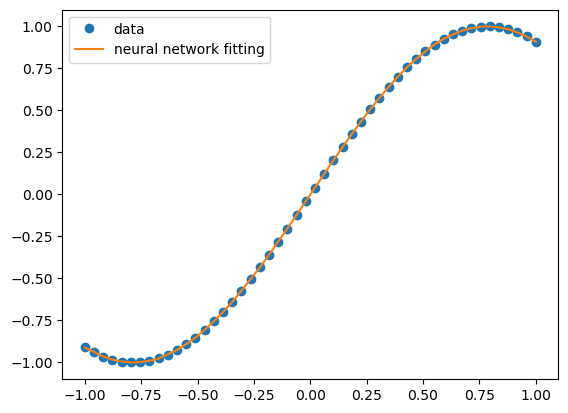

Change the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.
nuerons is now 8
layers is 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 5.90e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 4.12e-03; elapsed time: 0.57 sec
epoch: 2000; MSE: 8.29e-04; elapsed time: 1.15 sec
epoch: 3000; MSE: 2.77e-04; elapsed time: 1.73 sec
epoch: 4000; MSE: 2.05e-04; elapsed time: 2.30 sec
epoch: 5000; MSE: 1.64e-04; elapsed time: 2.90 sec
epoch: 6000; MSE: 1.35e-04; elapsed time: 3.46 sec
epoch: 7000; MSE: 1.22e-04; elapsed time: 4.04 sec
epoch: 8000; MSE: 1.16e-04; elapsed time: 4.63 sec
epoch: 9000; MSE: 1.15e-04; elapsed time: 5.20 sec
epoch: 9999; MSE: 1.15e-04; elapsed time: 5.20 sec


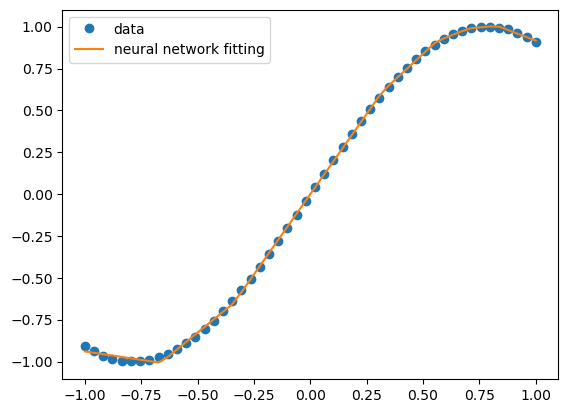

nuerons is now 16
layers is 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 7.68e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 9.60e-04; elapsed time: 0.57 sec
epoch: 2000; MSE: 4.75e-04; elapsed time: 1.21 sec
epoch: 3000; MSE: 3.02e-04; elapsed time: 1.83 sec
epoch: 4000; MSE: 8.20e-05; elapsed time: 2.41 sec
epoch: 5000; MSE: 7.78e-06; elapsed time: 3.02 sec
epoch: 6000; MSE: 6.92e-06; elapsed time: 3.63 sec
epoch: 7000; MSE: 6.41e-06; elapsed time: 4.21 sec
epoch: 8000; MSE: 6.16e-06; elapsed time: 4.83 sec
epoch: 9000; MSE: 5.81e-06; elapsed time: 5.44 sec
epoch: 9999; MSE: 4.74e-06; elapsed time: 5.44 sec


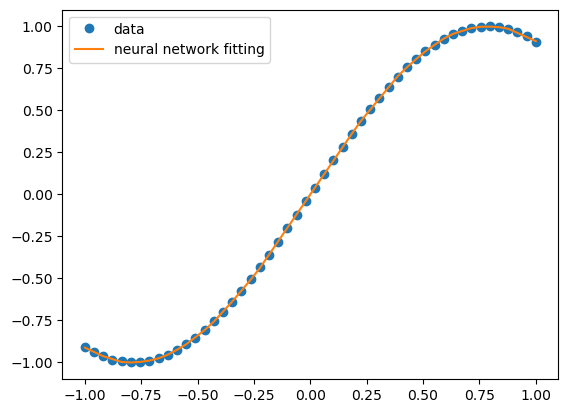

nuerons is now 32
layers is 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 6.88e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 4.85e-04; elapsed time: 0.61 sec
epoch: 2000; MSE: 3.94e-05; elapsed time: 1.20 sec
epoch: 3000; MSE: 7.45e-06; elapsed time: 1.80 sec
epoch: 4000; MSE: 2.50e-06; elapsed time: 2.39 sec
epoch: 5000; MSE: 1.26e-06; elapsed time: 3.00 sec
epoch: 6000; MSE: 9.19e-07; elapsed time: 3.58 sec
epoch: 7000; MSE: 5.21e-05; elapsed time: 4.17 sec
epoch: 8000; MSE: 7.32e-07; elapsed time: 4.81 sec
epoch: 9000; MSE: 6.99e-07; elapsed time: 5.42 sec
epoch: 9999; MSE: 6.63e-07; elapsed time: 5.42 sec


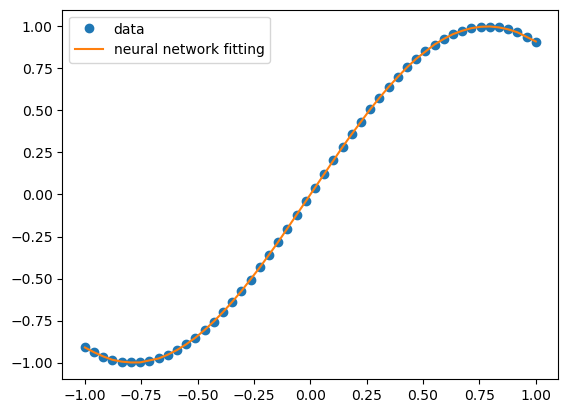

nuerons is now 64
layers is 2
Learning rate is 0.001
iteration  is 10000
number of layers init 2
epoch: 0; MSE: 6.29e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 1.47e-05; elapsed time: 0.72 sec
epoch: 2000; MSE: 1.77e-06; elapsed time: 1.43 sec
epoch: 3000; MSE: 7.57e-07; elapsed time: 2.12 sec
epoch: 4000; MSE: 5.30e-07; elapsed time: 2.84 sec
epoch: 5000; MSE: 6.20e-07; elapsed time: 3.50 sec
epoch: 6000; MSE: 2.64e-07; elapsed time: 4.15 sec
epoch: 7000; MSE: 1.99e-07; elapsed time: 4.87 sec
epoch: 8000; MSE: 1.77e-07; elapsed time: 5.56 sec
epoch: 9000; MSE: 1.14e-05; elapsed time: 6.21 sec
epoch: 9999; MSE: 6.59e-07; elapsed time: 6.21 sec


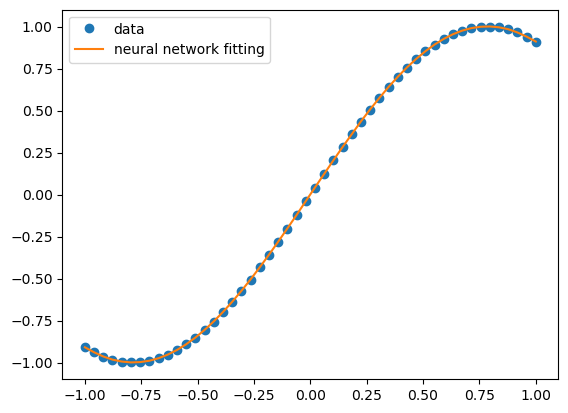

In [90]:
# Change 𝑛=1,10,100 and chane amount of layers. prob3 changes for the N amount prob3a changes for layers
# f is n
f = 1
arr9 = np.array([])
arr10 = np.array([])
arr7t = np.array([])
arr8t = np.array([])
for i in range(3):
    print("n is:",f)
    arr7t,arr8t = prob3(10000,f)
    arr9 = np.append(arr9,arr7t)
    arr10 = np.append(arr10,arr8t)
    f *= 10

In [104]:
print("line 1 of array of numbers is 𝑛=1,line 2 n = 10,line 3 n = 100 \n")
print("Change the number of layers to 2, 4, 6, 8. Report and explain your results. ")
print("Kept neurons at 10 while changeing 𝑛 and number of layers to 2, 4, 6, 8.\n",arr9)
print("Change the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.")
print("kept layers at 2 while changeing 𝑛 and neurons to 8,16,32,64\n",arr10)


line 1 of array of numbers is 𝑛=1,line 2 n = 10,line 3 n = 100 

Change the number of layers to 2, 4, 6, 8. Report and explain your results. 
Kept neurons at 10 while changeing 𝑛 and number of layers to 2, 4, 6, 8.
 [5.86284907e-04 4.59873809e-06 6.87706870e-06 1.40109512e-06
 1.01921287e-05 6.11935275e-06 1.39582507e-05 3.53375526e-06
 1.73505359e-05 1.36152867e-05 2.94321148e-06 7.89902629e-07]
Change the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.
kept layers at 2 while changeing 𝑛 and neurons to 8,16,32,64
 [2.67143205e-05 1.54316731e-05 1.59418732e-06 4.69829246e-07
 5.30018187e-05 2.58256896e-05 3.90197147e-06 1.69928427e-07
 1.14667338e-04 4.74462604e-06 6.63409423e-07 6.59470118e-07]


### Problem 3

Run the code for feedforward neural network with 2 hidden layers. Change the number of data points to be 10000 and the function to be approximated to
$y = \sin(n x)$ with $n=1,10,100$. (Hint: change the line: N = 50 y_data = torch.sin(2*x_data))

#### 1. Change the number of layers to 2, 4, 6, 8. Report and explain your results. 

### 2. Change the number of neurons in each hidden layer to 8, 16, 32, 64. Report and explain your results.

### Increasing nuerons gets a smaller loss function
### Increasing layers gets a smaller loss function